In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df2 = pd.read_csv(r"/content/Speed Dating Data.csv",sep=',',encoding='Windows-1252')
df2.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df2[['iid', 'wave',
        'gender', 'age', 'field', 'field_cd', 'undergra','mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career','career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater','movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es','match','dec',   'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','met','satis_2', 'length', 'numdat_2',
       'you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']]
df.describe()

,iid,wave,gender,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,match_es,match,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,satis_2,length,numdat_2,you_call,them_cal,date_3,numdat_3,num_in_3
count,8378.000000,8378.000000,8378.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,7205.000000,8378.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7463.000000,7463.000000,7433.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000
mean,283.675937,11.350919,0.500597,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,5.006762,2.158091,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,5.570556,3.207814,0.164717,0.419909,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.134087,5.207523,0.948769,5.711510,1.843495,2.338087,0.780825,0.981631,0.376950,1.230615,0.934132
std,158.583367,5.995903,0.500029,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.444531,1.105246,3.309520,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,1.734059,4.762569,2.444813,0.370947,0.493573,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,1.841285,2.129565,0.989889,1.820764,0.975662,0.631240,1.611694,1.382139,0.484683,1.294557,0.753902
min,1.000000,1.000000,0.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,7.000000,0.000000,24.000000,5.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,5.000000,2.000000,2.000000,0.000000,0.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,281.000000,11.000000,1.000000,26.000000,8.000000,2.000000,3.000000,3.000000,2.000000,5.000000,2.000000,6.000000,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,6.000000,4.000000,3.000000,0.000000,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,0.000000,6.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,407.000000,15.000000,1.000000,28.000000,10.000000,4.000000,6.000000,6.000000,2.000000,6.000000,3.000000,7.000000,9.000000,7.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000,7.000000,8.000000,4.000000,0.000000,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000,7.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,552.000000,21.000000,1.000000,55.000000,18.000000,6.000000,10.000000,10.000000,6.000000,7.000000,7.000000,17.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,

In [7]:
df['gender'] = df['gender'].map({0:'Women',1:'men'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Statistiques Descriptives du Dataset


Text(0.5, 1.0, 'Gender Value')

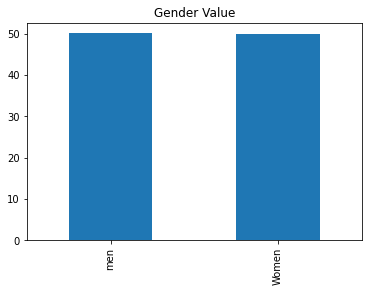

In [10]:
ax=df.gender.value_counts(normalize=True).mul(100).plot(kind='bar')
plt.title('Gender Value')



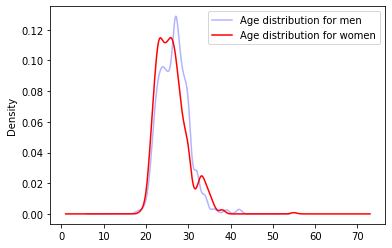

In [11]:
plt.figure()
df[df.gender=='men'].age.plot(kind='kde', color='blue' ,alpha=0.3, label='Age distribution for men')
df[df.gender=='Women'].age.plot(kind='kde', color='Red', label='Age distribution for women')
plt.legend()
plt.show()


In [12]:
# Summarize ages through specific dataset
df['age'] = df.age.fillna(int(df.age.mean()))
df['age_c'] = ['<20' if x <20 else '<25' if x <25  else '<30' if x <30   else '>30' for x in df['age']]
dataset = df.groupby(by='age_c')['gender'].value_counts(normalize=True).mul(100).to_frame().rename(columns={'gender' : 'count'}).reset_index('gender')

# To get a good age pyramid chart, we need to negate the values of one of the categorical variables. In this case, women.
def minus(x,y):
  if y == 'women':
    x = -1 * x
  return round(x,0)

dataset['count'] = dataset.apply(lambda x: minus(x['count'], x['gender']), axis=1)
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,count
age_c,,
<20,men,67.0
<20,Women,33.0
<25,Women,56.0
<25,men,44.0
<30,men,52.0
<30,Women,48.0
>30,men,54.0
>30,Women,46.0


In [30]:
df['race'] = df['race'].fillna(0)
df['race'] = ['Black' if x == 1 else 'European' if x ==2  else 'Latino' if x == 3 else 'Asian' if x == 4 else 'Native' if x == 5 else 'Other' for x in df['race']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



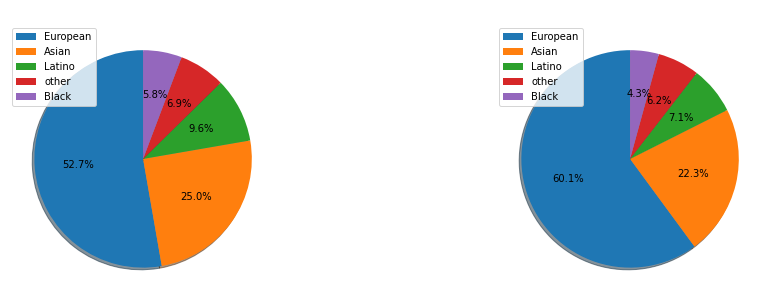

In [17]:

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

ax= df[df.gender =='Women'].race.value_counts()
labels= 'European' , 'Asian' , 'Latino' , 'other' , 'Black'
plt.pie(ax,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(labels)
plt.title('Women origin repartition', color='white')



plt.subplot(1,2,2)
ay=df[df.gender =='men'].race.value_counts()
plt.pie(ay,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Men origin repartition',color='white')
plt.legend(labels)



plt.show()


df[df.gender =='Women'].race.value_counts().plot(kind='pie')
plt.title('Women origin repartition')
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.subplot(1,2,2)
df[df.gender =='men'].race.value_counts().plot(kind='pie',)
plt.title('Men origin repartition')
centre_circle = plt.Circle((0,0),0.65,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

AttributeError: ignored

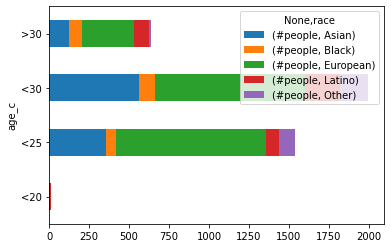

In [18]:
ax1 = df[df.gender=='Women'].groupby(by=[ 'age_c','race'])['race'].agg(['count']).rename(columns={'count' : '#people'}).sort_index(axis = 0).unstack().fillna(0).plot(kind='barh', stacked=True)
for c in ax1.containers:
    ax1.bar_label(c, label_type='center', color='white')
plt.legend(loc = 'best')
plt.title('Race repartition by age among women');


ax2 = df[df.gender=='men'].groupby(by=[ 'age_c','race'])['race'].agg(['count']).rename(columns={'count' : '#people'}).sort_index(axis = 0).unstack().fillna(0).plot(kind='barh', stacked=True)
for c in ax2.containers:
    ax2.bar_label(c, label_type='center', color='white')
plt.legend(loc = 'best')
plt.title('Race repartition by age among men');

In [19]:
df['field_cd'].fillna(0, inplace=True)

education = { 
              0 : 'unknown',
              1 : 'Law ',
              2 : 'Math',
              3 : 'Social Science',
              4 : 'Medical Science',
              5 : 'Engineering  ',
              6 : 'Litterature',
              7 : 'History',
              8 : 'Business',
              9 : 'Education',
              10 : 'Sciences',
              11 : 'Social Work ',
              12 : 'Undergrad',
              13: 'Political Affairs ',
              14 : 'Film',
              15 : 'Fine Arts',
              16: 'Languages',
              17 : 'Architecture',
              18 : 'Other'}

df['field_cd'] = df.field_cd.map(education)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



AttributeError: ignored

<Figure size 432x288 with 0 Axes>

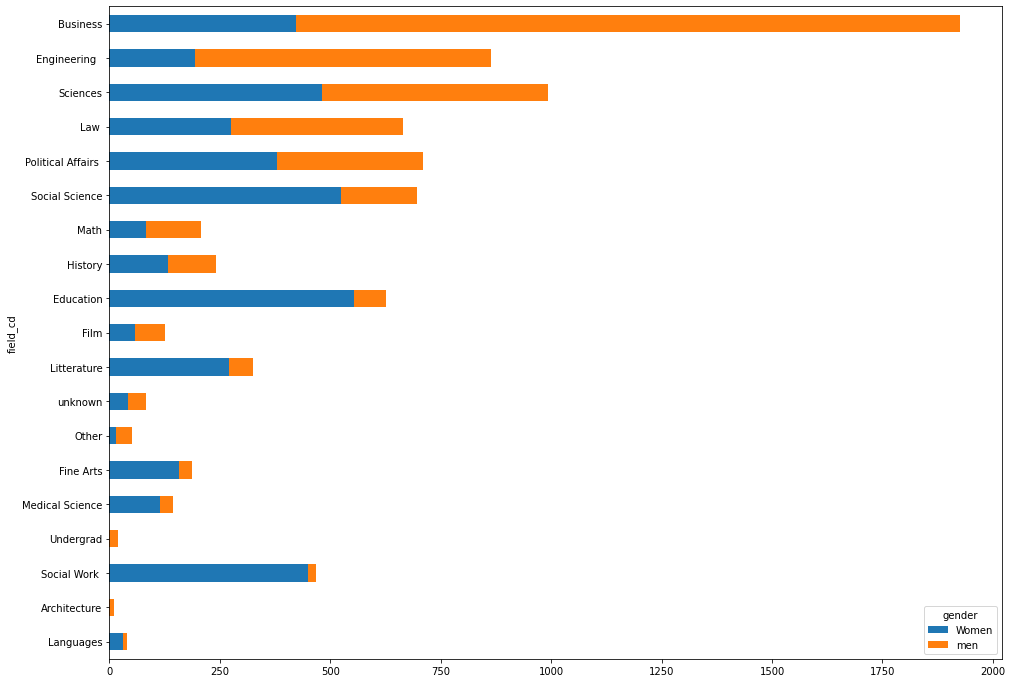

In [20]:
temp = df.groupby(by=['field_cd', 'gender'])['gender'].agg('count').unstack().fillna(0)
temp.women = temp.apply(lambda x: -1 * x['Women'], axis=1)

fig = plt.figure()
ax = temp.sort_values(by='men', ascending=True).plot(kind='barh',stacked=True, figsize=(16,12))
for c in ax.containers:
    ax.bar_label(c, label_type='center', color = 'white' )
plt.legend(loc='best')
plt.title('An over-representation of men in the fields of business and engineering\nAn over-representation of women in the fields of social sciences; saocial, litterature & education\ngirls are good girls as usual')
plt.show()

In [22]:
df2.dropna(subset=['income']).drop_duplicates(subset=['iid'])

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,0,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,NaN,NaN,2.0,...,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
30,4,4.0,0,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1.0,NaN,NaN,NaN,2.0,...,NaN,0.0,0.0,0.0,NaN,NaN,20.0,20.0,20.0,20.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
40,5,5.0,0,9,1,1,10,4,NaN,1,1,11.0,0,-0.43,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,7.0,6.0,6.0,5.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,2.0,...,NaN,0.0,0.0,0.0,NaN,NaN,30.0,10.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN
50,6,6.0,0,11,1,1,10,8,NaN,5,1,11.0,0,0.33,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,9.0,8.0,9.0,8.0,4.0,7.0,4.0,2.0,23.0,law,1.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8026,537,7.0,1,14,2,21,22,21,13.0,9,1,509.0,1,0.67,1,28.0,4.0,10.0,20.0,30.0,10.0,10.0,20.0,1,5.0,4.0,5.0,6.0,6.0,7.0,6.0,6.0,2.0,22.0,Electrical Engineering,5.0,UC Berkeley,"1,309.00","15,162.00",4.0,...,9.0,2.0,1.0,1.0,1.0,NaN,20.0,10.0,25.0,20.0,5.0,20.0,20.0,10.0,25.0,20.0,5.0,20.0,30.0,10.0,10.0,25.0,0.0,25.0,15.0,20.0,20.0,15.0,10.0,20.0,8.0,9.0,8.0,9.0,10.0,8.0,9.0,9.0,9.0,9.0
8158,543,13.0,1,26,2,21,22,21,12.0,10,1,509.0,0,0.04,1,28.0,4.0,10.0,20.0,30.0,10.0,10.0,20.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,24.0,Electrical Engineering,5.0,University of Southern California,"1,320.00","25,533.00",4.0,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8180,544,14.0,1,28,2,21,22,21,5.0,17,1,509.0,0,-0.04,1,28.0,4.0,10.0,20.0,30.0,10.0,10.0,20.0,1,3.0,7.0,6.0,5.0,5.0,6.0,5.0,2.0,NaN,23.0,Biomedical Engineering,5.0,U.C. Berkeley,"1,309.00","15,162.00",4.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8202,545,15.0,1,30,2,21,22,21,19.0,3,1,509.0,0,0.03,0,28.0,4.0,10.0,20.0,30.0,10.0,10.0,20.0,1,7.0,5.0,6.0,5.0,5.0,6.0,6.0,3.0,2.0,24.0,Biomedical Informatics,5.0,Columbia,"1,430.00","26,908.00",2.0,...,6.0,1.0,1.0,1.0,1.0,NaN,20.0,20.0,20.0,20.0,10.0,10.0,20.0,20.0,20.0,20.0,10.0,10.0,30.0,10.0,20.0,20.0,10.0,10.0,20.0,20.0,20.0,20.0,10.0,

In [24]:
df2.income.isna().sum()/len(df2.income) * 100

48.92575793745524

In [26]:

data_revenue = df2.dropna(subset=['income'])


In [28]:
data_revenue = data_revenue[['gender', 'age', 'race',  'imprace', 'imprelig', 
       'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'exphappy', 'expnum', 'match_es', 'match', 'dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met',
       'satis_2', 'length', 'numdat_2', 'you_call', 'them_cal', 'date_3',
       'numdat_3', 'num_in_3']][(df2.wave == 1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Matrice de corrélation


Text(0.5, 0.98, 'Matrice de corrélation')

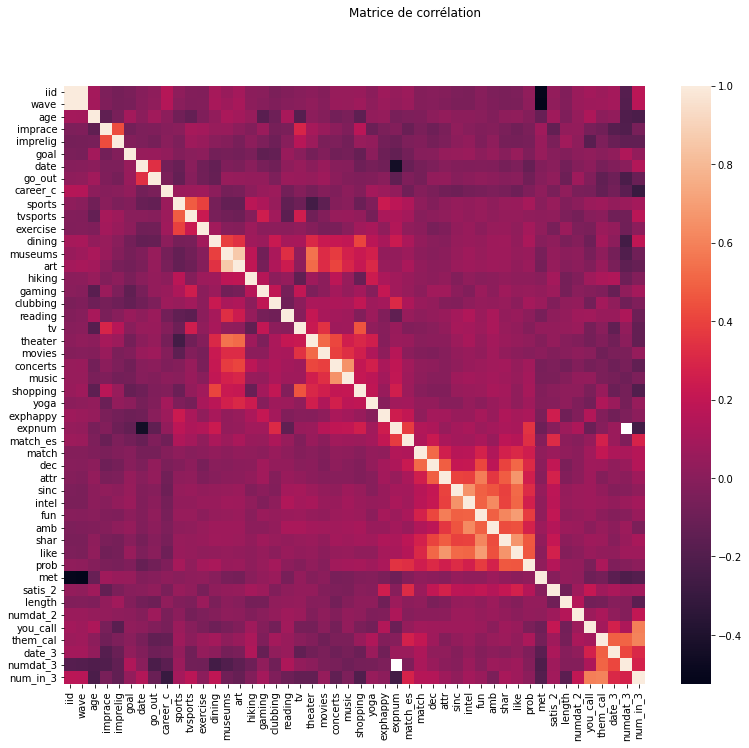

In [29]:
corr = df.corr()

plt.figure(figsize=(13,11))
sns.heatmap(corr)
plt.suptitle("Matrice de corrélation")


